# Исследование тарифов телеком оператора Мегалайн

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Оглавление
1. [Шаг 1. Открытие файла с данными и изучение общей информации](#step1)

2. [Шаг 2. Подготовка данных:](#step2)<br>
 2.1. [Приведение типов данных](#step2-1)<br>
 2.2. [Поиск ошибок](#step2-2)<br>
 2.3. [Аггрегация данных](#step2-3)<br>
 2.4. [Помесячная выручка](#step2-4)<br>
3. [Шаг 3. Анализ данных](#step3)<br>
 3.1. [Сумма звонков, трафика и сообщений](#step3-1)<br>
 3.2. [Среднее, дисперсия, стд. отклонение](#step3-2)<br>
 3.3. [Гистограммы звонков, трафика, СМС и дохода](#step3-3)<br>
 3.4. [Описание распределений](#step3-4)<br>
4. [Шаг 4. Проверка гипотез](#step4)<br>
 4.1. [ Различие средней выручки](#step4-1)<br>
 4.2. [Различие средней выручки Москвы и других регионов](#step4-2)<br>
5. [Шаг 5. Общий вывод](#step5)<br>

# Шаг 1. Открытие файла с данными и изучение общей информации 
<a id="step1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df_calls    = pd.read_csv('./datasets/calls.csv')
df_internet = pd.read_csv('./datasets/internet.csv')
df_messages = pd.read_csv('./datasets/messages.csv')
df_tariffs  = pd.read_csv('./datasets/tariffs.csv')
df_users    = pd.read_csv('./datasets/users.csv')


df_calls.info()   
df_calls.head()
# call_date -> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
df_internet.info()
df_internet.head()
# Unnamed: 0 -> drop
# session_date -> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [3]:
df_messages.info()
df_messages.head()
#message_date -> dateime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [4]:
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
df_users.info()
df_users.head()
#reg_date -> datetime
#churn_date -> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


###### Вывод

После импорта таблицы, обнаружил следующие недостатки:
- Во всех таблицах поле с датой имеет тип object. Его необходимо будет привести к типу даты.
- В таблице internet имеется лишний столбец Undefined: 0, который необходимо удалить. Он дублирует индекс.

# Шаг 2. Подготовка данных
<a id ="step2"></a>


Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

- [x] Приведите данные к нужным типам.
- [ ] Найдите и исправьте ошибки в данных.

## 2.1 Приведение типов данных
<a id="step2-1"></a>


In [6]:
print('Количество пропусков в столбце churn_date:', df_users['churn_date'].isna().sum())

Количество пропусков в столбце churn_date: 462


In [7]:
# Удаляем лишний столбец
if ('Unnamed: 0') in df_internet.columns:
    df_internet = df_internet.drop(('Unnamed: 0'), axis = 1)


# Приведение формата к дате для поля call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

# Приведение формата к дате для поля session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

# Приведение формата к дате для поля message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

# Приведение формата к дате для поля reg_date, churn_date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

# Если пользователь все еще пользуется тарифом, то заполняем дату оттока датой регистрации
df_users.loc[df_users['churn_date'].isna(), 'churn_date'] = df_users.loc[df_users['churn_date'].isna(), 'reg_date']
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [8]:
print('Количество пропусков в столбце churn_date:', df_users['churn_date'].isna().sum())

Количество пропусков в столбце churn_date: 0


## 2.2 Поиск ошибок 
<a id="step2-2"></a>

In [9]:
print(df_calls.duration.describe())
print()
print(df_internet.mb_used.describe())

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


In [10]:
df_internet.query('mb_used == 0 and user_id == 1000').sort_values(by = 'session_date')

,id,mb_used,session_date,user_id
103,1000_103,0.0,2018-05-26,1000
72,1000_72,0.0,2018-06-15,1000
131,1000_131,0.0,2018-06-15,1000
67,1000_67,0.0,2018-06-16,1000
193,1000_193,0.0,2018-06-17,1000
46,1000_46,0.0,2018-06-30,1000
157,1000_157,0.0,2018-07-11,1000
201,1000_201,0.0,2018-08-21,1000
11,1000_11,0.0,2018-08-28,1000
111,1000_111,0.0,2018-09-01,1000


In [11]:
# С помощью NumPy округляем вверх минуты и мегабайты перед аггрегацией данных и приводим к инту, чтобы работало быстрее
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')

In [12]:
# Извлекаем месяц из даты звонка
df_calls['month'] = df_calls['call_date'].dt.strftime('%m')


# Извлекаем месяц из даты сессии
df_internet['month'] = df_internet['session_date'].dt.strftime('%m')


# Извлекаем месяц из даты сообщения
df_messages['month'] = df_messages['message_date'].dt.strftime('%m')

## 2.3 Аггрегация данных по юзеру
<a id="step2-3"></a>


- Посчитайте для каждого пользователя:
 - [x] количество сделанных звонков и израсходованных минут разговора по месяцам;
 - [x] количество отправленных сообщений по месяцам;
 - [x] объем израсходованного интернет-трафика по месяцам;

In [13]:
# Группируем звонки по кол-ву и сумме + по юзеру и по месяцам
df_pivot_calls = (df_calls
 .pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
 .sort_values(by = ['user_id', 'month'], ascending = True)
)


# Группируем интернет по кол-ву и сумме объема + по юзеру и по месяцам
df_pivot_internet = (df_internet
 .pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['count', 'sum'])
 .sort_values(by = ['user_id', 'month'], ascending = True)
)


# Группируем сообщения по сумме штук + по юзеру и по месяцам
df_pivot_messages = (df_messages
 .pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')
 .sort_values(by = ['user_id', 'month'], ascending = True)
)

In [14]:
# Собираем в одну таблицу расходы по юзерам с аггрегацией по user_id, month
df = (df_pivot_calls
      .merge(df_pivot_internet, how = 'outer', left_on = ['user_id', 'month'], right_on = ['user_id', 'month'])
      .merge(df_pivot_messages, how = 'outer', left_on = ['user_id', 'month'], right_on = ['user_id', 'month'])
      .sort_values(by = ['user_id', 'month'], ascending = True)
     )
df.info()
df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 05) to (1499, 12)
Data columns (total 5 columns):
(count, duration)    3174 non-null float64
(sum, duration)      3174 non-null float64
(count, mb_used)     3203 non-null float64
(sum, mb_used)       3203 non-null float64
message_date         2717 non-null float64
dtypes: float64(5)
memory usage: 139.1+ KB


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


(count, duration)  (sum, duration)  (count, mb_used)  \
user_id month                                                         
1000    05                  22.0            159.0               5.0   
        06                  43.0            172.0              49.0   
        07                  47.0            340.0              29.0   
        08                  52.0            408.0              29.0   
        09                  58.0            466.0              27.0   
...                          ...              ...               ...   
1498    10                  41.0            247.0              59.0   
1499    09                   9.0             70.0               5.0   
        10                  68.0            449.0              58.0   
        11                  74.0            612.0              49.0   
        12                  69.0            492.0              45.0   

               (sum, mb_used)  message_date  
user_id month                                
1000    05             2256.0          22.0  
        06            23257.0          60.0  
        07            14016.0          75.0  
        08            14070.0          81.0  
        09            14581.0          57.0  
...                       ...           ...  
1498    10            20604.0          42.0  
1499    09             1848.0          11.0  
        10            17809.0          48.0  
        11            17984.0          59.0  
        12            13077.0          66.0  

[3214 rows x 5 columns]

In [15]:
# Переименовываем столбцы
df.columns = ['count_duration', 'sum_duration', 'count_mb_used', 'sum_mb_used', 'count_messages']

In [16]:
# Получаем описательную статистику по расходам юзеров
df.describe()

,count_duration,sum_duration,count_mb_used,sum_mb_used,count_messages
count,3174.000000,3174.000000,3203.000000,3203.000000,2717.000000
mean,63.833333,456.931632,46.642523,17286.749610,45.283769
std,32.678036,238.031270,18.696094,7523.580332,35.051363
min,1.000000,0.000000,1.000000,0.000000,1.000000
25%,41.000000,290.000000,35.000000,12543.000000,19.000000
50%,63.000000,447.000000,48.000000,16985.000000,38.000000
75%,83.000000,592.000000,59.000000,21455.500000,63.000000
max,244.000000,1673.000000,118.000000,49789.000000,224.000000


<hr>

###### Вывод
В принципе, все нормально. Квартили и среднее лежат хорошо. 

Есть некоторые большие значения в каждом столбце суммы, но это сверхтарифа идет. Сначала посчитаю все так, а после попробую удалить выбросы и посмотреть на результат.
<hr>

In [17]:
print('Количество пропущенных звонков: {:.2%}'.format(df_calls.query('duration == 0')['duration'].count() / df_calls.shape[0]))


Количество пропущенных звонков: 19.55%


In [18]:
# Сводим в одну таблицу юзеров и данные по тарифам
df_users = df_users.join(df_tariffs.set_index('tariff_name'), on = 'tariff', how = 'left')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,2018-05-25,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,2018-11-01,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,2018-06-17,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,2018-08-17,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,2018-05-14,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


In [19]:
# Объединяем юзеров и расходы по звонкам, трафику и сообщениям
df2 = df.reset_index().merge(df_users, how = 'left', on = 'user_id')
df2

,user_id,month,count_duration,sum_duration,count_mb_used,sum_mb_used,count_messages,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,05,22.0,159.0,5.0,2256.0,22.0,52,2018-05-25,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,06,43.0,172.0,49.0,23257.0,60.0,52,2018-05-25,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,07,47.0,340.0,29.0,14016.0,75.0,52,2018-05-25,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,08,52.0,408.0,29.0,14070.0,81.0,52,2018-05-25,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,09,58.0,466.0,27.0,14581.0,57.0,52,2018-05-25,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,59.0,20604.0,42.0,68,2018-10-25,Владикавказ,...,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,09,9.0,70.0,5.0,1848.0,11.0,35,2018-09-27,Пермь,...,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,10,68.0,449.0,58.0,17809.0,48.0,35,2018-09-27,Пермь,...,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,11,74.0,612.0,49.0,17984.0,59.0,35,2018-09-27,Пермь,...,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [20]:
print('Пропуски в общей таблице:\n', df2.isna().sum())

# Заполняем пропуски в сведенной таблице + приводим типы
for column in df2.columns:
    df2.loc[df2[column].isna(), column] = 0
    
    if column in ('year', 'month', 'count_mb_used', 'count_duration', 'count_messages'):
        df2[column] = df2[column].astype('int')

Пропуски в общей таблице:
 user_id                    0
month                      0
count_duration            40
sum_duration              40
count_mb_used             11
sum_mb_used               11
count_messages           497
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64


In [21]:
print('Пропуски в общей таблице после обработки:\n', df2.isna().sum())

Пропуски в общей таблице после обработки:
 user_id                  0
month                    0
count_duration           0
sum_duration             0
count_mb_used            0
sum_mb_used              0
count_messages           0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
count_duration           3214 non-null int64
sum_duration             3214 non-null float64
count_mb_used            3214 non-null int64
sum_mb_used              3214 non-null float64
count_messages           3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          321

In [23]:
df2['sum_duration'] = df2['sum_duration'].astype('int')
df2['sum_mb_used'] = df2['sum_mb_used'].astype('int')

df2['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df2['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
count_duration           3214 non-null int64
sum_duration             3214 non-null int64
count_mb_used            3214 non-null int64
sum_mb_used              3214 non-null int64
count_messages           3214 non-null int64
age                      3214 non-null int64
churn_date               500 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 500 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message   

## 2.4 Помесячная выручка
<a id="step2-4"></a>


 - [x] посчитать помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
 - [x] остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [25]:
# Добавляем разницу использованных и включенных в тариф мб, минут, сообщений
df2['diff_mb_used'] = df2['sum_mb_used'] - df2['mb_per_month_included']
df2['diff_duration'] = df2['sum_duration'] - df2['minutes_included']
df2['diff_messages'] = df2['count_messages'] - df2['messages_included']

In [26]:
df2

,user_id,month,count_duration,sum_duration,count_mb_used,sum_mb_used,count_messages,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,diff_mb_used,diff_duration,diff_messages
0,1000,5,22,159,5,2256,22,52,2018-05-25,Краснодар,...,1000,30720,3000,1950,150,1,1,-28464,-2841,-978
1,1000,6,43,172,49,23257,60,52,2018-11-01,Краснодар,...,1000,30720,3000,1950,150,1,1,-7463,-2828,-940
2,1000,7,47,340,29,14016,75,52,2018-06-17,Краснодар,...,1000,30720,3000,1950,150,1,1,-16704,-2660,-925
3,1000,8,52,408,29,14070,81,52,2018-08-17,Краснодар,...,1000,30720,3000,1950,150,1,1,-16650,-2592,-919
4,1000,9,58,466,27,14581,57,52,2018-05-14,Краснодар,...,1000,30720,3000,1950,150,1,1,-16139,-2534,-943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,59,20604,42,68,NaT,Владикавказ,...,50,15360,500,550,200,3,3,5244,-253,-8
3210,1499,9,9,70,5,1848,11,35,NaT,Пермь,...,50,15360,500,550,200,3,3,-13512,-430,-39
3211,1499,10,68,449,58,17809,48,35,NaT,Пермь,...,50,15360,500,550,200,3,3,2449,-51,-2
3212,1499,11,74,612,49,17984,59,35,NaT,Пермь,...,50,15360,500,550,200,3,3,2624,112,9


In [27]:
# Считаем оплату с юзера в месяц 
def income(row):

    result = 0

    if row['diff_mb_used'] > 0:
        result += np.ceil(row['diff_mb_used'] / 1024) * row['rub_per_gb']

    elif row['diff_duration'] > 0:
        result += row['diff_duration'] * row['rub_per_minute']

    elif row['diff_messages'] > 0:
        result += row['diff_messages'] * row['rub_per_message']


    result += row['rub_monthly_fee']
    
    return result

df2['income'] = df2.apply(income, axis = 1)

In [28]:
df2

,user_id,month,count_duration,sum_duration,count_mb_used,sum_mb_used,count_messages,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,diff_mb_used,diff_duration,diff_messages,income
0,1000,5,22,159,5,2256,22,52,2018-05-25,Краснодар,...,30720,3000,1950,150,1,1,-28464,-2841,-978,1950.0
1,1000,6,43,172,49,23257,60,52,2018-11-01,Краснодар,...,30720,3000,1950,150,1,1,-7463,-2828,-940,1950.0
2,1000,7,47,340,29,14016,75,52,2018-06-17,Краснодар,...,30720,3000,1950,150,1,1,-16704,-2660,-925,1950.0
3,1000,8,52,408,29,14070,81,52,2018-08-17,Краснодар,...,30720,3000,1950,150,1,1,-16650,-2592,-919,1950.0
4,1000,9,58,466,27,14581,57,52,2018-05-14,Краснодар,...,30720,3000,1950,150,1,1,-16139,-2534,-943,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,59,20604,42,68,NaT,Владикавказ,...,15360,500,550,200,3,3,5244,-253,-8,1750.0
3210,1499,9,9,70,5,1848,11,35,NaT,Пермь,...,15360,500,550,200,3,3,-13512,-430,-39,550.0
3211,1499,10,68,449,58,17809,48,35,NaT,Пермь,...,15360,500,550,200,3,3,2449,-51,-2,1150.0
3212,1499,11,74,612,49,17984,59,35,NaT,Пермь,...,15360,500,550,200,3,3,2624,112,9,1150.0


# Шаг 3. Анализ данных
<a id="step3"></a>

Опишите поведение клиентов оператора, исходя из выборки. 
- [x] Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- [x] Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- [x] Постройте гистограммы. 
- [x] Опишите распределения.

## 3.1 Сумма звонков, трафика, СМС и дохода по месяцам по тарифам
<a id="step3-1"></a>


Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [29]:
# Суммируем по всем юзерам звонки, сообщения и трафик по тарифам и группируем по месяцам
df2_pivot = (df2
             .pivot_table(
                 index = 'month', 
                 columns = 'tariff',
                 values = ['sum_mb_used', 'sum_duration', 'count_messages', 'income'],
                 aggfunc = 'mean'
             )
            )

In [30]:
df2_pivot

count_messages                  income              sum_duration  \
tariff          smart      ultra        smart        ultra        smart   
month                                                                     
1           18.235294  33.777778   716.823529  1950.000000   203.852941   
2           24.086207  21.958333   798.586207  1975.000000   298.689655   
3           31.857143  32.297297  1080.935065  2014.864865   390.051948   
4           30.741071  31.563636   907.187500  2001.818182   367.133929   
5           33.773050  37.850746  1135.900709  2061.940299   387.361702   
6           33.402439  41.726190  1149.701220  2041.071429   395.640244   
7           33.751244  49.846154  1152.970149  2121.428571   408.353234   
8           33.638298  48.439252  1219.829787  2083.177570   421.468085   
9           33.638462  52.286957  1161.361538  2024.347826   428.611538   
10          33.765306  58.430894  1250.707483  2067.073171   426.136054   
11          34.075949  55.791045  1236.867089  2093.283582   435.265823   
12          35.994065  60.611511  1409.753709  2138.848921   478.560831   

                     sum_mb_used                
tariff       ultra         smart         ultra  
month                                           
1       428.111111   8524.441176  13153.555556  
2       297.125000  11611.396552  11786.958333  
3       489.648649  15123.857143  17551.972973  
4       458.018182  13479.482143  16843.800000  
5       510.328358  15825.198582  19381.194030  
6       479.702381  15814.768293  18942.238095  
7       545.791209  15763.512438  20514.648352  
8       510.775701  16632.174468  19594.065421  
9       539.443478  16324.526923  19222.208696  
10      558.081301  16778.564626  20063.869919  
11      541.380597  16917.531646  19805.313433  
12      592.805755  18136.833828  21813.589928

## 3.2 Среднее, дисперсия, стд. отклонение
<a id="step3-2"></a>


Посчитайте среднее количество, дисперсию и стандартное отклонение. 

In [31]:
# Дисперсия с параметром ddof, т.к. у нас не вся выборка, а только 500 пользователей
var_ultra_messages = np.var(df2.query('tariff == "ultra"')['count_messages'], ddof = 1)
var_ultra_mb_used  = np.var(df2.query('tariff == "ultra"')['sum_mb_used'], ddof = 1)
var_ultra_duration = np.var(df2.query('tariff == "ultra"')['sum_duration'], ddof = 1)
var_ultra_income   = np.var(df2.query('tariff == "ultra"')['income'], ddof = 1)

var_smart_messages = np.var(df2.query('tariff == "smart"')['count_messages'], ddof = 1)
var_smart_mb_used  = np.var(df2.query('tariff == "smart"')['sum_mb_used'], ddof = 1)
var_smart_duration = np.var(df2.query('tariff == "smart"')['sum_duration'], ddof = 1)
var_smart_income   = np.var(df2.query('tariff == "smart"')['income'], ddof = 1)


# Стандартное отклонение через корень из дисперсии
std_ultra_messages = np.sqrt(var_ultra_messages)
std_ultra_mb_used  = np.sqrt(var_ultra_mb_used)
std_ultra_duration = np.sqrt(var_ultra_duration)
std_ultra_income   = np.sqrt(var_ultra_income)

std_smart_messages = np.sqrt(var_smart_messages)
std_smart_mb_used  = np.sqrt(var_smart_mb_used)
std_smart_duration = np.sqrt(var_smart_duration)
std_smart_income   = np.sqrt(var_smart_income)

# Собираем все в именованный массив, чтобы потом создать дф
math = {
    'ultra_mean' : {
        'messages' : df2.query('tariff == "ultra"')['count_messages'].mean(),
        'mb_used'  : df2.query('tariff == "ultra"')['sum_mb_used'].mean(),
        'duration' : df2.query('tariff == "ultra"')['sum_duration'].mean(),
        'income'   : df2.query('tariff == "ultra"')['income'].mean()
    },
    'ultra_variance' : {
        'messages' : var_ultra_messages,
        'mb_used'  : var_ultra_mb_used,
        'duration' : var_ultra_duration,
        'income'   : var_ultra_income
    },
    'ultra_std' : {
        'messages' : std_ultra_messages,
        'mb_used'  : std_ultra_mb_used,
        'duration' : std_ultra_duration,
        'income'   : std_ultra_income
    },
    'smart_mean' : {
        'messages' : df2.query('tariff == "smart"')['count_messages'].mean(),
        'mb_used'  : df2.query('tariff == "smart"')['sum_mb_used'].mean(),
        'duration' : df2.query('tariff == "smart"')['sum_duration'].mean(),
        'income'   : df2.query('tariff == "smart"')['income'].mean()
    },
    'smart_variance' : {
        'messages' : var_smart_messages,
        'mb_used'  : var_smart_mb_used,
        'duration' : var_smart_duration,
        'income'   : var_smart_income
    },
    'smart_std' : {
        'messages' : std_smart_messages,
        'mb_used'  : std_smart_mb_used,
        'duration' : std_smart_duration,
        'income'   : std_smart_income
    }
}


df_math = pd.DataFrame(data = math).round(2)
df_math

,ultra_mean,ultra_variance,ultra_std,smart_mean,smart_variance,smart_std
messages,49.36,2.285270e+03,47.80,33.38,796.81,28.23
mb_used,19486.90,1.019356e+08,10096.32,16229.19,34545911.13,5877.58
duration,526.62,1.008736e+05,317.61,417.93,36219.32,190.31
income,2071.07,1.434912e+05,378.80,1192.57,517944.43,719.68


## 3.3 Гистограммы звонков, трафика, СМС и дохода

<a id="step3-3"></a>

Постройте гистограммы.

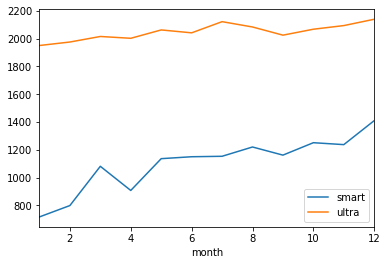

In [32]:
ax = df2_pivot.plot(y = [('income', 'smart')], kind = 'line')
df2_pivot.plot(y = [('income', 'ultra')], kind = 'line', ax = ax)
plt.legend(['smart', 'ultra'])
plt.show()

In [ ]:
# Мы хотим посмотреть анализ услуги, что нам нужно: табличка со статистиками \ распределение \ график среднего расхода в месяц

def analysis(df, service):
    # статистики
    pivot = df.pivot_table(index = 'tariff', values = service, aggfunc = ['mean', 'var', 'std', 'sum'])
    print('Статистики по ', service)
    display(pivot)
    
    # гистграмма
    fig = px.histogram(df, x = usluga, color = 'tariff', marginal = 'box', title = 'Распределение ' +service)
    fig.show()
    
    # средний расход в месяцц
    fig = px.line(df.pivot_table(index = ['tariff', 'month'], values = service, aggfunc = 'mean').reset_index(), x = 'month', y = service, color = 'tariff', title = 'Средний расход в месяц ' +service)
    
    fig.show()
    
# Формируем колонки по услугам, по которым запустим функцию analysis
columns = ['sum_duration', 'sum_mb_used', 'count_messages', 'income']

for col in columns: 
    analysis(df2, col)

## 3.4 Описание распределений

<a id="step3-4"></a>

Опишите распределения.

###### Звонки
Ультра: больше медиана, длинный правый ус. Пара выбросов. По использованию количества минут данные распределены равномерно по всей плоскости, если не считать пропущенных звонков. 

Плоскость распределения от 5 до 800 минут. Оба тарифа на протяжении года растут по сумме разговоров. В тарифе Смарт пользователи приближаются к лимиту в рамках месяца, то в Ультре лимит в 6 раз больше текущего значения.

У тарифа Ультра на всех графиках есть пик падения потребления в феврале.


###### Мегабайты
Количество трафика распределено нормально вокруг лимита в тарифе Смарт. По Ультре, думаю, мало юзеров, поэтому равномерное. Была бы больше выборка, получили бы большее количество. Но есть предположение, поскольку медиана около 20гб находится, то пользователям просто 15-20 гб в месяц хватает.

Общее количество потребления растет постепенно на протяжении года. Возможно, больше медиа-контента потребляется. Смарт выходит за рамки во второй половине года. Ультра не доходит до границы.


###### Сообщения
Количество сообщений смещено влево. Думаю, обусловлено снижением популярности СМС и увеличение общения в мессенджерах. 
В тарифе Ультра есть сильный разброс вправо.

На протяжении года кол-во СМС в Ультре растет, в то время как в Смарте остается практически на одном уровне.


###### Доход по тарифу
В текущей выборке тариф Smart приносит больше денег. Возможно, это связано с тем, что количество пользователей в выборке этого тарифа больше.

###### Выручка всего

In [34]:
print('Общая выручка по тарифу Ultra {:,.0f} руб.'.format(df2.query('tariff == "ultra"')['income'].sum()))
print('Общая выручка по тарифу Smart {:,.0f} руб.'.format(df2.query('tariff == "smart"')['income'].sum()))

Общая выручка по тарифу Ultra 2,040,000 руб.
Общая выручка по тарифу Smart 2,658,246 руб.


###### Выручка на юзера

In [35]:
print('Выручка по тарифу Ultra на 1 пользователя {:,.0f} руб.'.format(df2.query('tariff == "ultra"')['income'].sum() / df_users.query('tariff == "ultra"')['user_id'].count()))
print('Общая выручка по тарифу Smart на 1 пользователя {:,.0f} руб.'.format(df2.query('tariff == "smart"')['income'].sum() / df_users.query('tariff == "smart"')['user_id'].count()))

print('Пользователей Ultra: {}'.format(df_users.query('tariff == "ultra"')['user_id'].count()))
print('Пользователей Smart: {}'.format(df_users.query('tariff == "smart"')['user_id'].count()))

Выручка по тарифу Ultra на 1 пользователя 13,691 руб.
Общая выручка по тарифу Smart на 1 пользователя 7,573 руб.
Пользователей Ultra: 149
Пользователей Smart: 351


###### Общий вывод по тарифам
- Вариативность пользователей тарифа Ультра выше, чем Смарт, но они все равно остаются в рамках тарифа.
- Пользователи Смарт чаще выходят за рамки лимита и доплачивают.
- В среднем пользователи тарифа Ультра потребляют больше всего: звонков, мегабайт, сообщений.


Несмотря на повышенную вариативность юзеров с тарифом Ультра, пользователи тарифа Смарт чаще выходят за пределы лимита и доплачивают по повышенному тарифу. Это приносит дополнительный доход от пользователей тарифа Смарт. Однако, на гистограмме дохода видно, что бОльшая часть доплаты меньше цены тарифа Ультра и лежит до 1950 рублей.

Подтверждением этому дополнительно является значение ARPPU в разрезе тарифов. Пользователи тарифа Ультра платят практически в 2 раза больше.


Интересный вывод: падение потребления у пользователей тарифа Ультра никак не влияет на основное тело дохода, в то время как снижение потребления пользователями тарифа Смарт приведут к ощущаемым снижениям дохода, поскольку исчезнут переплаты сверх-тарифа.

# Шаг 4. Проверка гипотез

<a id="step4"></a>

- [x] средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- [x] средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

## 4.1 Различие средней выручки

<a id="step4-1"></a>

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

###### Гипотезы
Нулевая гипотеза H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Первая гипотеза H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [36]:
from scipy import stats as st

alpha = 0.05

income_smart = df2_pivot[('income', 'smart')]
income_ultra = df2_pivot[('income', 'ultra')]

results = st.ttest_ind(income_smart, income_ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.906941749662057e-10
Отвергаем нулевую гипотезу


###### Вывод
pvalue 8.906941749662057e-10, что меньше 0.05. Это значит, что pvalue входит в доверительный инвервал. Мы отвергаем нулевую гипотезу, которая гласит: <b>"Средняя выручка пользователей двух тарифов равна".</b> И делаем вывод, что средняя выручка различается.

## 4.2 Различие средней выручки Москвы и других регионов

<a id="step4-2"></a>

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [37]:
# Заполняем регионы
def check_region(row):
    if "Москва" in row['city']:
        result = "Москва"
    else:
        result = "Другой регион"
    
    return result

df2['region'] = df2.apply(check_region, axis = 1)

In [38]:
df2['region'].value_counts()

Другой регион    2603
Москва            611
Name: region, dtype: int64

###### Гипотезы
Нулевая гипотеза H0: средняя выручка пользователей из Москвы и других регионов равна.

Первая гипотеза H1: средняя выручка пользователей из Москвы и других регионов различается.

In [39]:
# Суммируем по всем юзерам звонки, сообщения и трафик по тарифам и группируем по месяцам
df3_pivot = (df2
             .pivot_table(
                 index = 'month', 
                 columns = 'region',
                 values = ['sum_mb_used', 'sum_duration', 'count_messages', 'income'],
                 aggfunc = 'sum'
             )
            )

In [40]:
df3_pivot

count_messages               income            sum_duration         \
region  Другой регион Москва Другой регион    Москва Другой регион Москва   
month                                                                       
1                 707    217       30122.0   11800.0          7605   3179   
2                1620    304       77266.0   16452.0         19450   5005   
3                3141    507      125582.0   32200.0         39713   8438   
4                4374    805      168673.0   43032.0         54610  11700   
5                6147   1151      241647.0   56665.0         73353  15457   
6                7492   1491      289732.0   70269.0         85438  19742   
7                9255   2065      345060.0   79737.0        106779  24967   
8               10672   2416      412837.0   96723.0        123595  30103   
9               12002   2757      431873.0  102881.0        138677  34798   
10              13727   3387      500779.0  121179.0        155120  38808   
11              14455   3789      534234.0  137116.0        165786  44303   
12              16301   4254      624798.0  147589.0        193524  50151   

         sum_mb_used           
region Другой регион   Москва  
month                          
1             278555   129658  
2             738569   217779  
3            1445369   368591  
4            1945387   490724  
5            2844683   685210  
6            3379261   805509  
7            4072357   962942  
8            4825997  1179129  
9            5219371  1235560  
10           5924916  1475838  
11           6352998  1646854  
12           7353730  1790472

In [41]:
alpha = 0.05

results = st.ttest_ind(df2.query('region == "Москва"')['income'], df2.query('region == "Другой регион"')['income'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.16719315014868472
Не получилось отвергнуть нулевую гипотезу


###### Вывод

pvalue 0.16719315014868472, что больше 0.05. Это не входит в доверительный интервал. Мы принимаем нулевую гипотезу, которая гласит: <b>"Средняя выручка пользователей Москвы и других регионов равна".</b>

##### Пояснение

<b>- как вы формулировали нулевую и альтернативную гипотезы: </b> нулевая гипотеза формулируется так, чтобы использовать знак равенства. Поскольку в условии стоит вопрос "выручки не равны", значит нулевая гипотеза будет обратной, где выручки равны.

<b>- какой критерий использовали для проверки гипотез и почему: </b> Поскольку необходимо было ответить на вопрос о разнице среднего дохода двух совокупностей (сначала тарифов, потом регионов), то использовал гипотезу о равенстве средних двух генеральных совокупностей.

# Шаг 5. Общий вывод

<a id="step5"></a>

Изучив по новому сагрегированные данные, в частности распределения дохода по тарифам, пришел к выводу, что несмотря на то, что пользователи тарифа Смарт чаще выходят за лимит тарифа, они платят меньше, чем стоит тарифа Ультра.

ARPPU у пользователей тарифа Ультра практически в 2 раза выше.

Таким образом, компании необходимо сосредоточиться на продвижении тарифа Ультра.

Дополнительный вывод: поскольку мы не нашли подтверждения гипотезы о том, что в Москве средний доход выше, рекламный бюджет можно распределить на регионы, где реклама будет дешевле, таким образом получитс привлечь больше новых клиентов по меньшей цене.